In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D toolkit

In [2]:
df = pd.read_csv("./kmeans_data.txt", delim_whitespace=True, header=None)

In [3]:
type(df.iloc[0])

pandas.core.series.Series

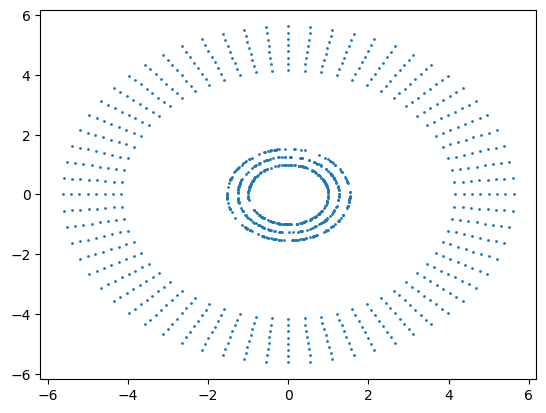

In [4]:
plt.scatter(df[0], df[1], s=1)

In [5]:
def hand_crafted_feature(row:pd.Series):
    row = row.to_numpy()
    return np.dot(row, row)

In [6]:
df[2] = df.apply(hand_crafted_feature, axis=1)

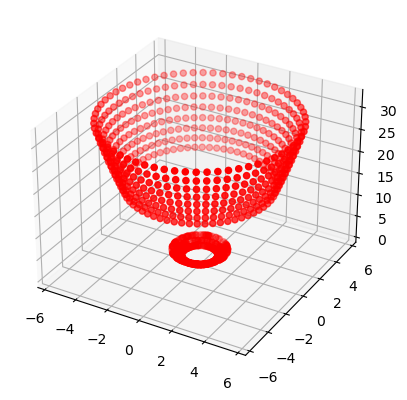

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2], c='r', marker='o')

In [8]:
def initialize_centroids(X:pd.DataFrame, K):
    # Randomly select K data points as initial centroids
    centroids = X.sample(n=K).reset_index(drop=True)
    return centroids

def assign_to_clusters(X:pd.DataFrame, centroids:pd.DataFrame):
    # Calculate distances from each data point to each centroid
    distances = np.zeros((len(centroids), len(X)))
    for i, centroid in centroids.iterrows():
        distances[i] = np.linalg.norm(X - centroid.values, axis=1)

    # Assign each data point to the cluster with the nearest centroid
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(X:pd.DataFrame, labels:np.ndarray, K):
    # Update centroids by computing the mean of data points in each cluster
    centroids = np.zeros((K, len(X.iloc[0])))
    for k in range(K):
        centroids[k] = X[labels == k].mean()
    return pd.DataFrame(centroids, columns=X.columns)

def k_means_clustering_from_scratch(X, K, max_iterations=100):
    # Assuming X is a pandas DataFrame with your data

    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, K)

    for iteration in range(max_iterations):
        # Step 2: Assign data points to clusters
        labels = assign_to_clusters(X, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, K)

        # Check for convergence
        if np.allclose(new_centroids, centroids, rtol=0.01):
            print(f"Done at {iteration}")
            break

        centroids = new_centroids

    return labels

In [9]:
labels = k_means_clustering_from_scratch(df[[0, 1, 2]], 2)

Done at 3


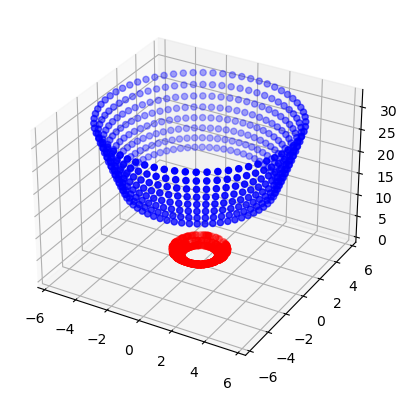

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df_1 = df[labels == 1]
df_0 = df[labels == 0]
ax.scatter(df_0[0], df_0[1], df_0[2], c='r', marker='o')
ax.scatter(df_1[0], df_1[1], df_1[2], c='b', marker='o')

# Landmark KMeans

In [11]:
from utils import kernel

In [12]:
df = pd.read_csv("./kmeans_data.txt", delim_whitespace=True, header=None)
df.iloc[0].values

array([-0.65224338, -0.75800961])

In [13]:
n = len(df)
L = 1
XL = df.sample(n=L).reset_index(drop=True)
XL

,0,1
0,-1.20952,-3.987251


In [14]:
def kernelized_vector(row):
    Kvec = np.zeros((L))
    for i in range(L):
        Kvec[i] = kernel(XL.iloc[i].values, row)
    return Kvec

In [15]:
X = np.zeros((n, L))
for i in range(n):
    X[i] = kernelized_vector(df.iloc[i].values)
X = pd.DataFrame(X)
X.head()

,0
0,0.341688
1,0.001973
2,0.000151
3,0.038654
4,0.007445


In [16]:
labels = k_means_clustering_from_scratch(X, 2)

Done at 8


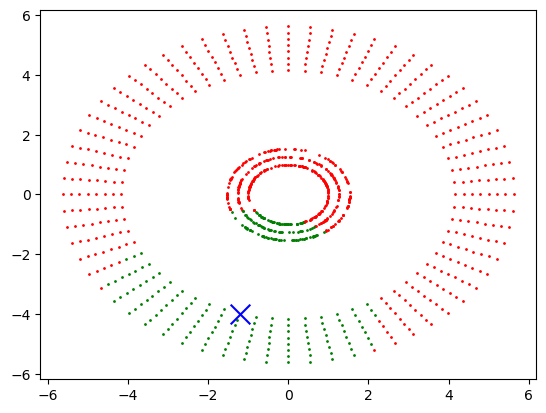

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_1 = df[labels == 1]
df_0 = df[labels == 0]
ax.scatter(df_0[0], df_0[1], c='r', s=1)
ax.scatter(df_1[0], df_1[1], c='g', s=1)
ax.scatter(XL[0], XL[1], c="b", s=200, marker='x')

In [26]:
X.iloc[0:L]

,0
0,0.341688
